In [34]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import joblib
from imblearn.over_sampling import SMOTE

In [35]:
# Importing Dataset
df = pd.read_excel('EN071R_REGISTER POLI IMUN SDIDTK JAN - 18 SEPTEMBER .xls')

#Data Understanding and Cleaning

In [36]:
df.head()

,Unnamed: 0,No,Tanggal Kunjungan,Nama,Tanggal Lahir,Umur,Jenis Kelamin,Agama,Status,Pendidikan,...,Diagnosis,Keterangan Diagnosis,Anamnesa,Catatan Fisik,Catatan Dokter,Rujukan,Obat,Askep,Unnamed: 37,Unnamed: 38
0,NaN,1.0,2024-01-02,HA********EF ALFARIZI,2023-11-25,0 Tahun 9 Bulan,PRIA,ISLAM,BELUM MENIKAH,LAINNYA,...,Z23.2,BCG + POLIO 1,tidak ada keluhan \nsuntik BCG,tidak ada keluhan \nsuntik BCG,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2.0,2024-01-02,AR********AHREZA,2023-12-27,0 Tahun 8 Bulan,PRIA,ISLAM,BELUM MENIKAH,LAINNYA,...,Z38.0,"KN 2, USIA 6HARI","tidak ada keluhan\nKN1\nasi +, mata belekan","tidak ada keluhan\nKN1\nasi +, mata belekan",NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,3.0,2024-01-02,AQ********AH,2023-12-26,0 Tahun 8 Bulan,PRIA,ISLAM,BELUM MENIKAH,LAINNYA,...,Z38.0,"KN 2, USIA 7HARI",tidak ada keluhan\nKN 1\n,tidak ada keluhan\nKN 1\n,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,4.0,2024-01-02,AR********HURROHMAN,2023-11-28,0 Tahun 9 Bulan,PRIA,ISLAM,BELUM MENIKAH,LAINNYA,...,Z23.2,BCG,tidak ada keluhan,tidak ada keluhan,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,5.0,2024-01-02,AN********NDYA KHAIYANG,2023-01-29,1 Tahun 7 Bulan,WANITA,ISLAM,BELUM MENIKAH,SMA,...,Z27.4,"MR, IPV2",tidak ada keluhan,tidak ada keluhan,NaN,NaN,-PARASETAMOL SYR 120 MG/5 ML | 1 BOTOL,NaN,NaN,NaN


In [37]:
# Drop unnecessary column
df = df[['Umur', 'Jenis Kelamin', 'BB', 'INDEX BB/U']]
df

,Umur,Jenis Kelamin,BB,INDEX BB/U
0,0 Tahun 9 Bulan,PRIA,4.67,BERAT BADAN NORMAL
1,0 Tahun 8 Bulan,PRIA,3.41,BERAT BADAN NORMAL
2,0 Tahun 8 Bulan,PRIA,3.12,BERAT BADAN NORMAL
3,0 Tahun 9 Bulan,PRIA,4.30,BERAT BADAN NORMAL
4,1 Tahun 7 Bulan,WANITA,6.20,BERAT BADAN KURANG
...,...,...,...,...
3433,NaN,NaN,NaN,NaN
3434,NaN,NaN,NaN,NaN
3435,NaN,NaN,NaN,NaN
3436,NaN,NaN,NaN,NaN


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3438 entries, 0 to 3437
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Umur           3422 non-null   object 
 1   Jenis Kelamin  3422 non-null   object 
 2   BB             3391 non-null   float64
 3   INDEX BB/U     3422 non-null   object 
dtypes: float64(1), object(3)
memory usage: 107.6+ KB


In [39]:
df.describe()

,BB
count,3391.000000
mean,10.248744
std,10.894337
min,1.500000
25%,4.900000
50%,7.300000
75%,10.830000
max,124.000000


In [40]:
# Handling null values
df.isna().sum()

,0
Umur,16
Jenis Kelamin,16
BB,47
INDEX BB/U,16


In [41]:
df = df.dropna()
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3391 entries, 0 to 3390
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Umur           3391 non-null   object 
 1   Jenis Kelamin  3391 non-null   object 
 2   BB             3391 non-null   float64
 3   INDEX BB/U     3391 non-null   object 
dtypes: float64(1), object(3)
memory usage: 106.1+ KB


<function matplotlib.pyplot.show(close=None, block=None)>

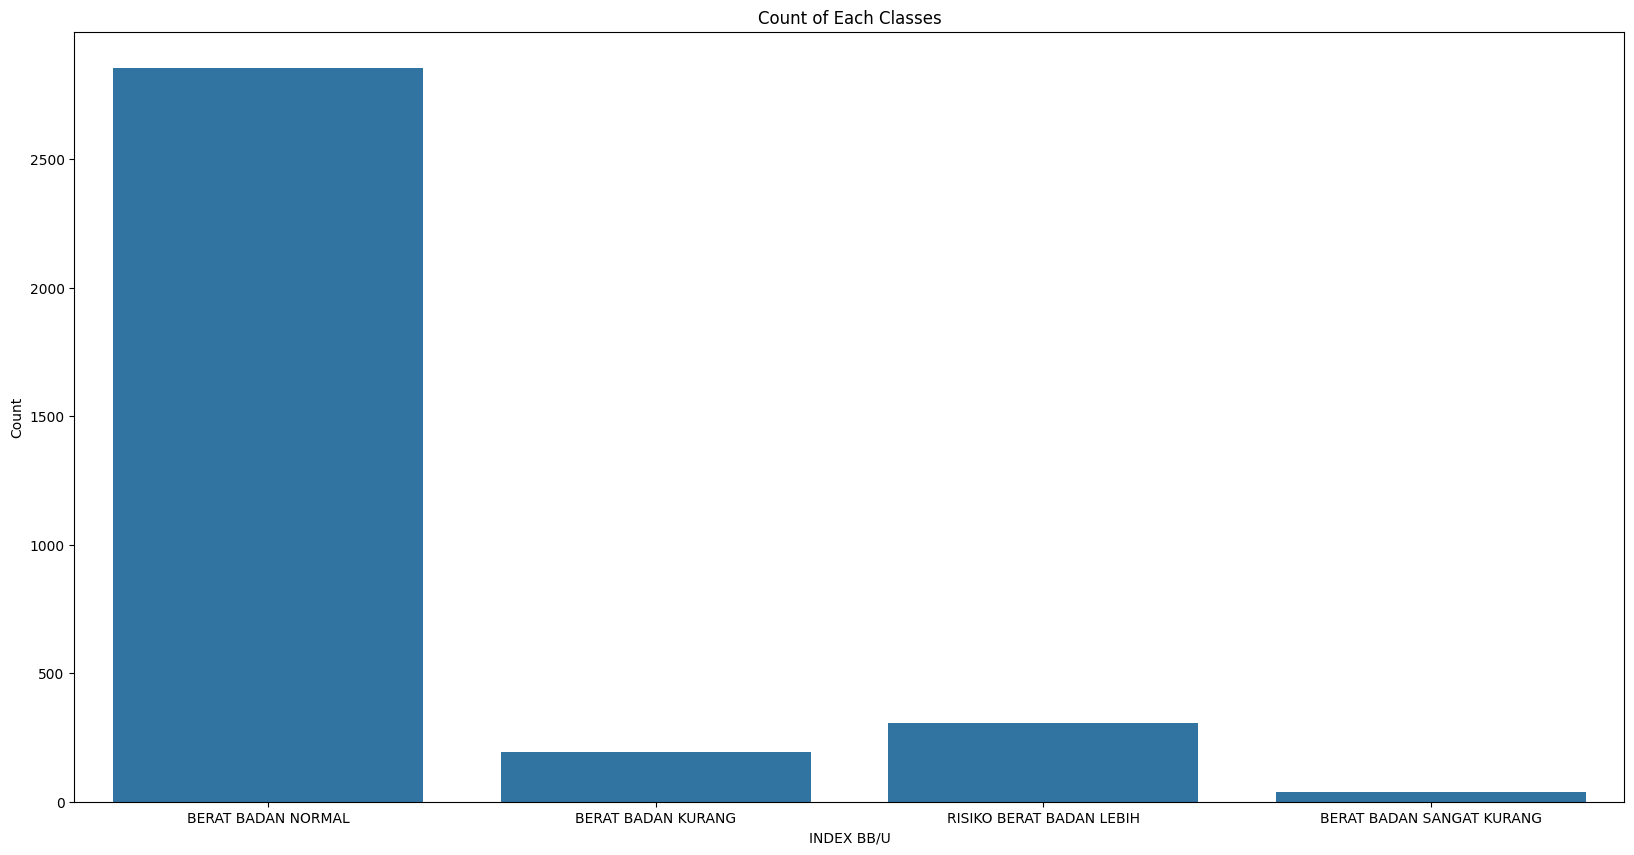

In [42]:
plt.figure(figsize=(20, 10))
sns.countplot(x='INDEX BB/U', data=df)
plt.title('Count of Each Classes')
plt.xlabel('INDEX BB/U')
plt.ylabel('Count')
plt.show

In [43]:
df.rename(columns={'Umur': 'Age in Month', 'BB': 'Weight', 'Jenis Kelamin': 'Gender'}, inplace=True)
df

,Age in Month,Gender,Weight,INDEX BB/U
0,0 Tahun 9 Bulan,PRIA,4.67,BERAT BADAN NORMAL
1,0 Tahun 8 Bulan,PRIA,3.41,BERAT BADAN NORMAL
2,0 Tahun 8 Bulan,PRIA,3.12,BERAT BADAN NORMAL
3,0 Tahun 9 Bulan,PRIA,4.30,BERAT BADAN NORMAL
4,1 Tahun 7 Bulan,WANITA,6.20,BERAT BADAN KURANG
...,...,...,...,...
3386,0 Tahun 3 Bulan,WANITA,5.60,BERAT BADAN NORMAL
3387,1 Tahun 7 Bulan,WANITA,9.90,BERAT BADAN NORMAL
3388,0 Tahun 0 Bulan,PRIA,3.50,BERAT BADAN NORMAL
3389,0 Tahun 1 Bulan,PRIA,4.50,BERAT BADAN NORMAL


In [44]:
# Converting Age values into month format
def convert_to_months(Age):
    # Separate the string
    parts = Age.split()
    year = int(parts[0])
    month = int(parts[2])
    # Convert and add months
    age_in_month = (year * 12) + month
    return age_in_month

df['Age in Month'] = df['Age in Month'].apply(convert_to_months)
df

,Age in Month,Gender,Weight,INDEX BB/U
0,9,PRIA,4.67,BERAT BADAN NORMAL
1,8,PRIA,3.41,BERAT BADAN NORMAL
2,8,PRIA,3.12,BERAT BADAN NORMAL
3,9,PRIA,4.30,BERAT BADAN NORMAL
4,19,WANITA,6.20,BERAT BADAN KURANG
...,...,...,...,...
3386,3,WANITA,5.60,BERAT BADAN NORMAL
3387,19,WANITA,9.90,BERAT BADAN NORMAL
3388,0,PRIA,3.50,BERAT BADAN NORMAL
3389,1,PRIA,4.50,BERAT BADAN NORMAL


In [45]:
# Convert Age in Month to integer
df['Age in Month'] = df['Age in Month'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3391 entries, 0 to 3390
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age in Month  3391 non-null   int64  
 1   Gender        3391 non-null   object 
 2   Weight        3391 non-null   float64
 3   INDEX BB/U    3391 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 106.1+ KB


In [46]:
# Remove rows with Age in Month above 60
df = df[df['Age in Month'] <= 60]

# Reset index after filtering
df = df.reset_index(drop=True)

print(df['INDEX BB/U'].value_counts())

INDEX BB/U
BERAT BADAN NORMAL           2473
RISIKO BERAT BADAN LEBIH      299
BERAT BADAN KURANG            188
BERAT BADAN SANGAT KURANG      36
Name: count, dtype: int64


# Data Preprocessing

In [47]:
# Encode categorical column
df['Gender'] = df['Gender'].map({'PRIA':0, 'WANITA':1})
df['INDEX BB/U'] = df['INDEX BB/U'].map({'BERAT BADAN SANGAT KURANG':0, 'BERAT BADAN KURANG':1, 'BERAT BADAN NORMAL':2,
                                           'RISIKO BERAT BADAN LEBIH':3})
print(df['Gender'].unique())
print(df['INDEX BB/U'].unique())



[0 1]
[2 1 3 0]


In [48]:
# Split training and testing data
X = df.drop(["INDEX BB/U"], axis=1)
y = df["INDEX BB/U"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

# kfold
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

Total # of sample in whole dataset: 2996
Total # of sample in train dataset: 2396
Total # of sample in test dataset: 600


In [49]:
# Normalize numerical features
numerical_features = ['Age in Month', 'Weight']
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

# Transform the test data using the same scaler
X_test[numerical_features] = scaler.transform(X_test[numerical_features])
X_train[numerical_features].head()

,Age in Month,Weight
1271,-0.150283,0.062253
1135,0.233759,-0.051770
1400,-0.380708,-0.072041
1299,-0.764751,-0.621886
2929,2.998864,0.746392


# Model Development

In [50]:
# initialize Random Classifier
rf = RandomForestClassifier()

# define the parameter grid
param_dist = {
    'n_estimators': [100, 200, 400],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_leaf': [2, 4, 6],
    'max_depth': [None, 10, 20],
    'criterion': ['gini', 'entropy'],
    'random_state': [42]
}

# Specify multiple scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

random_search = RandomizedSearchCV(estimator=rf,
                                   param_distributions=param_dist,
                                   n_iter=50,  # Number of combinations to sample
                                   scoring=scoring,
                                   refit='f1',
                                   cv=kfold,
                                   n_jobs=-1,
                                   verbose=1,
                                   random_state=42)  # For reproducibility

# Fit the model
random_search.fit(X_train, y_train)

# Retrieve the best model
best_rf_model_bb = random_search.best_estimator_

# Export the best model using joblib
joblib.dump(best_rf_model_bb, 'best_rf_model_bb.joblib')

Fitting 10 folds for each of 50 candidates, totalling 500 fits


['best_rf_model_bb.joblib']

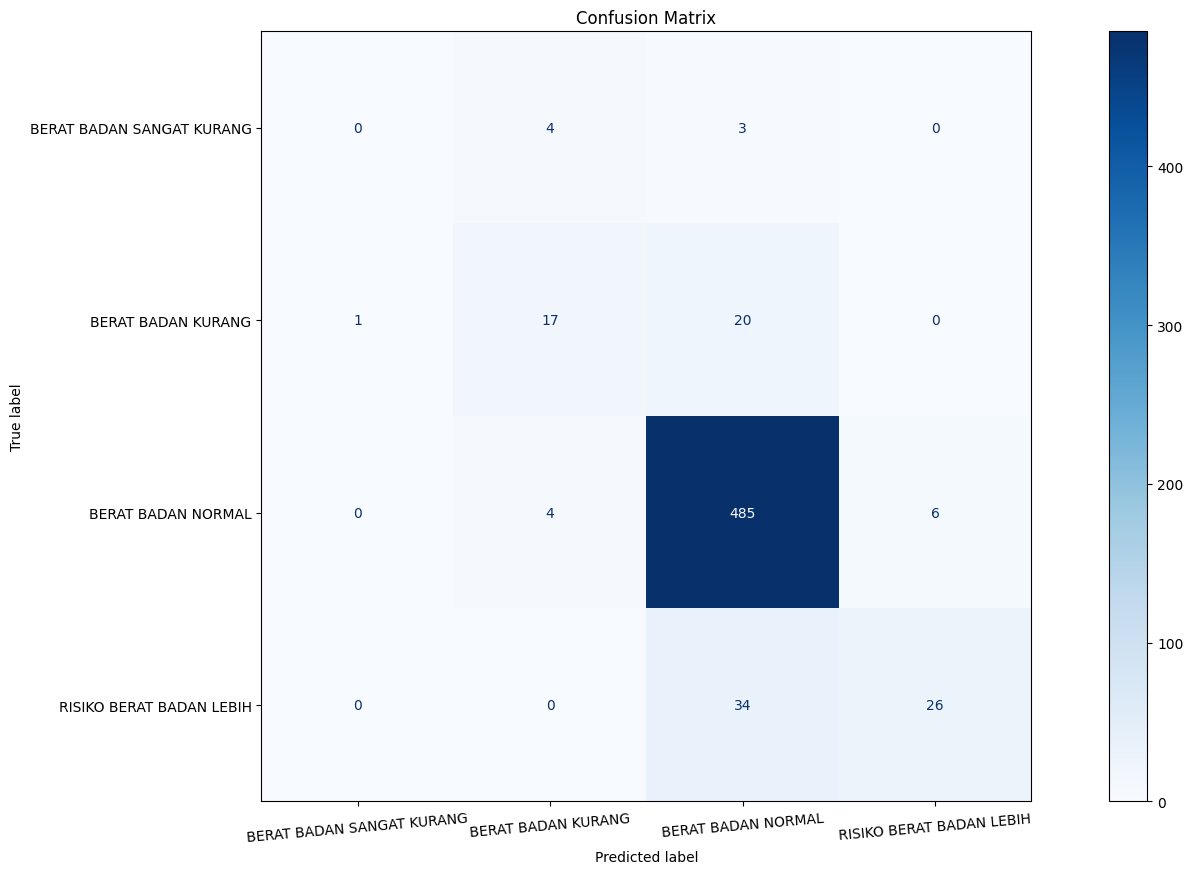

In [51]:
# Evaluate the model on the test data
y_pred = best_rf_model_bb.predict(X_test)
y_prob = best_rf_model_bb.predict_proba(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['BERAT BADAN SANGAT KURANG', 'BERAT BADAN KURANG',
                                                                   'BERAT BADAN NORMAL', 'RISIKO BERAT BADAN LEBIH'])
fig, ax = plt.subplots(figsize=(20, 10))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=5)
plt.title("Confusion Matrix")
plt.show()

In [52]:
# Classification evaluation scores (Accuracy, Precision, Recall, F1)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8800
Precision: 0.8626
Recall: 0.8800
F1 Score: 0.8624


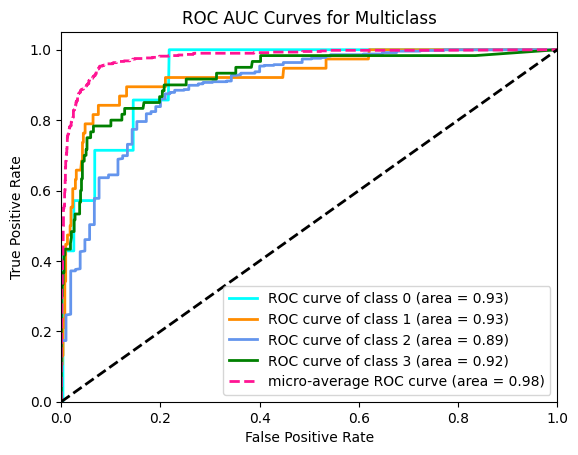

Micro-average ROC AUC (area = 0.98)
Macro-average ROC AUC (area = 0.92)


In [53]:
from sklearn.preprocessing import label_binarize

n_classes = len(np.unique(y_test))

# Binarize the labels for multiclass
y_test_binarized = label_binarize(y_test, classes=np.arange(n_classes))

# Initialize dictionaries for FPR, TPR, and AUC
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and ROC AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_prob[:, i])

# Compute micro-average ROC curve and ROC AUC
fpr_micro, tpr_micro, _ = roc_curve(y_test_binarized.ravel(), y_prob.ravel())
roc_auc_micro = roc_auc_score(y_test_binarized, y_prob, average="micro")

# Compute macro-average ROC AUC
roc_auc_macro = roc_auc_score(y_test_binarized, y_prob, average="macro")

# Plot ROC curves for each class
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, color='deeppink', linestyle='--', lw=2,
         label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc_micro))

# Plot random guessing line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curves for Multiclass')
plt.legend(loc="lower right")
plt.show()

# Print micro-average and macro-average ROC AUC
print("Micro-average ROC AUC (area = {:.2f})".format(roc_auc_micro))
print("Macro-average ROC AUC (area = {:.2f})".format(roc_auc_macro))

#SMOTE

## Data Preprocessing

In [54]:
# Apply SMOTE only to the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check the class distribution after applying SMOTE
print("Before SMOTE:")
print(y_train.value_counts())
print("\nAfter SMOTE:")
print(pd.Series(y_train_balanced).value_counts())

Before SMOTE:
INDEX BB/U
2    1978
3     239
1     150
0      29
Name: count, dtype: int64

After SMOTE:
INDEX BB/U
2    1978
3    1978
1    1978
0    1978
Name: count, dtype: int64


In [55]:
# Normalize numerical features
numerical_features = ['Age in Month', 'Weight']
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_balanced[numerical_features] = scaler.fit_transform(X_train_balanced[numerical_features])

# Transform the test data using the same scaler
X_test[numerical_features] = scaler.transform(X_test[numerical_features])
X_train_balanced[numerical_features].head()

,Age in Month,Weight
0,-0.262416,-0.010874
1,0.082098,-0.095253
2,-0.469124,-0.110254
3,-0.813638,-0.517148
4,2.562598,0.495399


## Model Development

In [56]:
# initialize Random Classifier
rf = RandomForestClassifier()

# define the parameter grid
param_dist = {
    'n_estimators': [100, 200, 400],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_leaf': [2, 4, 6],
    'max_depth': [None, 10, 20],
    'criterion': ['gini', 'entropy'],
    'random_state': [42]
}

# Specify multiple scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

random_search = RandomizedSearchCV(estimator=rf,
                                   param_distributions=param_dist,
                                   n_iter=50,  # Number of combinations to sample
                                   scoring=scoring,
                                   refit='f1',
                                   cv=kfold,
                                   n_jobs=-1,
                                   verbose=1,
                                   random_state=42)  # For reproducibility

# Fit the model
random_search.fit(X_train_balanced, y_train_balanced)

# Retrieve the best model
best_rf_model_smote_bb = random_search.best_estimator_

# Export the best model using joblib
joblib.dump(best_rf_model_smote_bb, 'best_rf_model_smote_bb.joblib')

Fitting 10 folds for each of 50 candidates, totalling 500 fits


['best_rf_model_smote_bb.joblib']

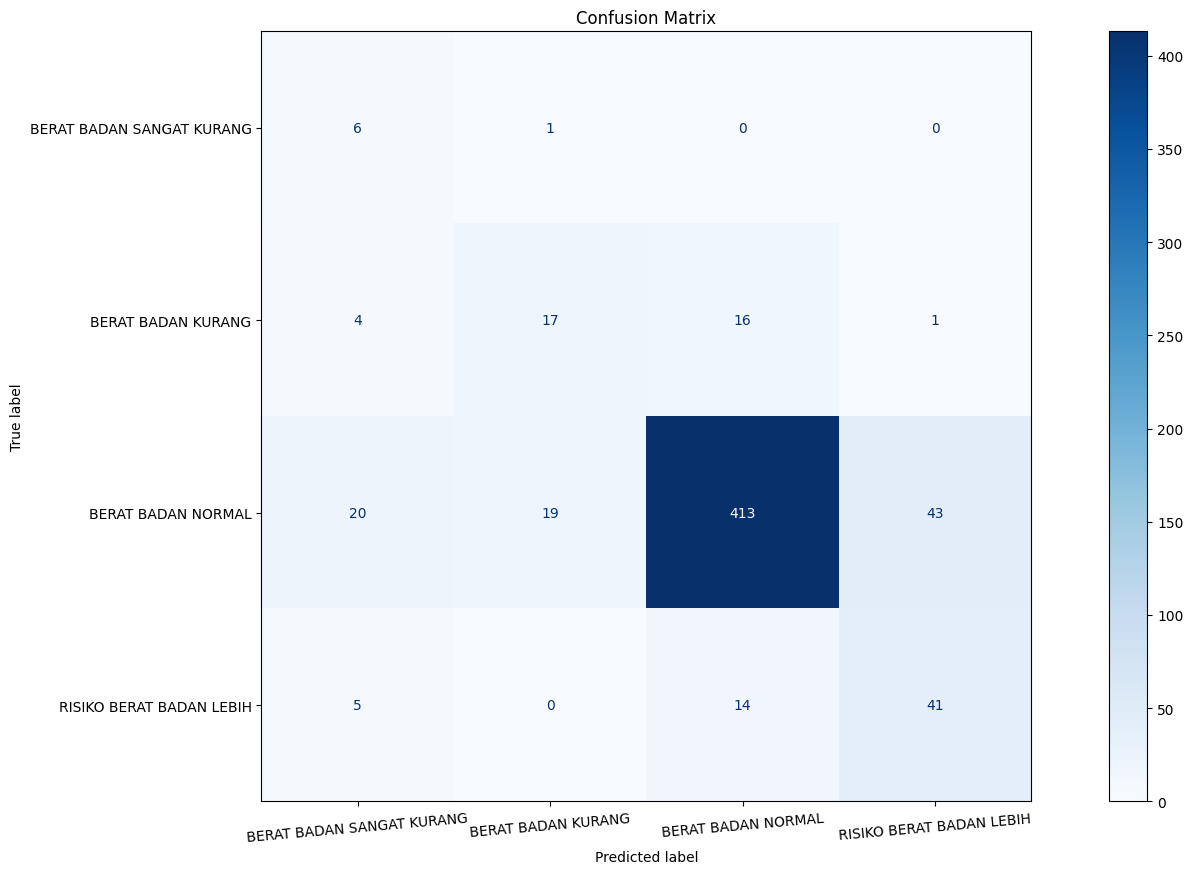

In [57]:
# Evaluate the model on the test data
y_pred = best_rf_model_smote_bb.predict(X_test)
y_prob = best_rf_model_smote_bb.predict_proba(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['BERAT BADAN SANGAT KURANG', 'BERAT BADAN KURANG',
                                                                   'BERAT BADAN NORMAL', 'RISIKO BERAT BADAN LEBIH'])
fig, ax = plt.subplots(figsize=(20, 10))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=5)
plt.title("Confusion Matrix")
plt.show()

In [58]:
# Classification evaluation scores (Accuracy, Precision, Recall, F1)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.7950
Precision: 0.8485
Recall: 0.7950
F1 Score: 0.8151


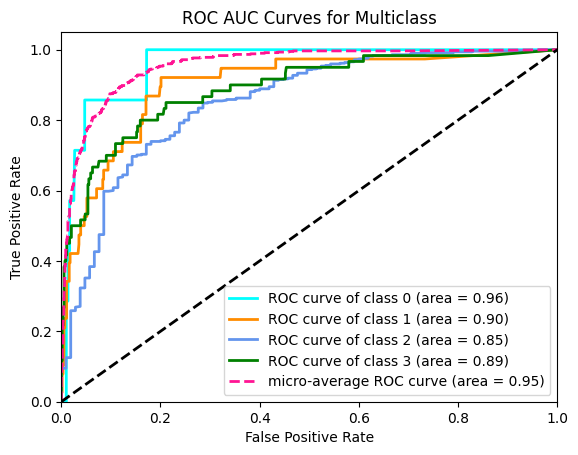

Micro-average ROC AUC (area = 0.95)
Macro-average ROC AUC (area = 0.90)


In [59]:
n_classes = len(np.unique(y_test))

# Binarize the labels for multiclass
y_test_binarized = label_binarize(y_test, classes=np.arange(n_classes))

# Initialize dictionaries for FPR, TPR, and AUC
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and ROC AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_prob[:, i])

# Compute micro-average ROC curve and ROC AUC
fpr_micro, tpr_micro, _ = roc_curve(y_test_binarized.ravel(), y_prob.ravel())
roc_auc_micro = roc_auc_score(y_test_binarized, y_prob, average="micro")

# Compute macro-average ROC AUC
roc_auc_macro = roc_auc_score(y_test_binarized, y_prob, average="macro")

# Plot ROC curves for each class
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, color='deeppink', linestyle='--', lw=2,
         label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc_micro))

# Plot random guessing line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curves for Multiclass')
plt.legend(loc="lower right")
plt.show()

# Print micro-average and macro-average ROC AUC
print("Micro-average ROC AUC (area = {:.2f})".format(roc_auc_micro))
print("Macro-average ROC AUC (area = {:.2f})".format(roc_auc_macro))